In [1]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
from google.colab import files

# Upload the files manually
uploaded = files.upload()

Saving r_Feminism_posts(afterElection).jsonl to r_Feminism_posts(afterElection).jsonl
Saving r_Feminism_posts(beforeElection).jsonl to r_Feminism_posts(beforeElection).jsonl


In [4]:
import json
import pandas as pd

# Load JSONL (line-delimited JSON)
def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

# Load both files
file_before = "r_Feminism_posts(beforeElection).jsonl"
file_after = "r_Feminism_posts(afterElection).jsonl"

data_before = load_jsonl(file_before)
data_after = load_jsonl(file_after)

# Convert to pandas DataFrames
df_before = pd.DataFrame(data_before)
df_after = pd.DataFrame(data_after)

# Display first 10 rows as table (before election)
print("📊 BEFORE Election")
df_before.head(50)


📊 BEFORE Election


,_meta,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,...,whitelist_status,wls,media_metadata,crosspost_parent,crosspost_parent_list,gallery_data,is_gallery,author_cakeday,link_flair_template_id,poll_data
0,{'retrieved_2nd_on': 1716984076},[],False,None,None,False,Sickofy0u,None,None,[],...,some_ads,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'retrieved_2nd_on': 1716986621},[],False,None,None,False,Additional-Scheme650,None,None,[],...,some_ads,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'retrieved_2nd_on': 1716988237},[],False,None,None,False,procret3332,None,None,[],...,some_ads,7,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'retrieved_2nd_on': 1716988310},[],False,None,None,False,procret3332,None,None,[],...,some_ads,7,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,{'retrieved_2nd_on': 1716991343},[],False,None,None,False,AnnaLookingforGlow,None,None,[],...,some_ads,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,{'retrieved_2nd_on': 1716991838},[],False,None,None,False,seeEcstatic_Broc,None,None,[],...,some_ads,7,NaN,t3_1d1onyr,"[{'all_awardings': [], 'allow_live_comments': ...",NaN,NaN,NaN,NaN,NaN
6,{'retrieved_2nd_on': 1716993838},[],False,None,None,False,Fatty_2311,None,None,[],...,some_ads,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"{'is_edited': True, 'removal_type': 'reddit', ...",[],False,None,None,False,OkCampaign7367,None,None,[],...,some_ads,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"{'is_edited': True, 'removal_type': 'automod_f...",[],False,None,None,False,Affectionate_Eye663,None,None,[],...,some_ads,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"{'removal_type': 'reddit', 'retrieved_2nd_on':...",[],False,None,None,False,ack44,None,None,[],...,some_ads,7,NaN,t3_1d25133,"[{'all_awardings': [], 'allow_live_comments': ...",NaN,NaN,NaN,NaN,NaN


In [5]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Combine both before & after datasets
df_all = pd.concat([df_before, df_after], ignore_index=True)

# Step 1: Filter out empty and removed posts
valid_texts = df_all['selftext'].dropna()
valid_texts = valid_texts[~valid_texts.str.lower().isin(['[removed]', '[deleted]', ''])]
valid_texts = valid_texts.astype(str)

# Step 2: Clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

cleaned_texts = valid_texts.apply(clean_text)

# Step 3: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_df=0.9, min_df=5)
X = vectorizer.fit_transform(cleaned_texts)

print("✅ Texts cleaned and vectorized.")
print("Shape of TF-IDF matrix:", X.shape)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✅ Texts cleaned and vectorized.
Shape of TF-IDF matrix: (3522, 6503)


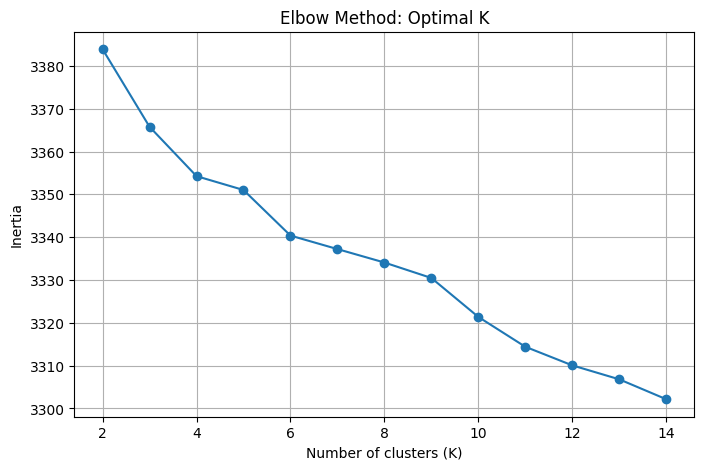

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of K values to test
K_range = range(2, 15)  # You can adjust the upper limit
inertias = []

# Loop through each K and compute inertia
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method: Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [7]:
from sklearn.cluster import KMeans

# Set K from elbow method
optimal_k = 5

# Fit the model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Get feature names and centroids
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Show top terms per cluster
print("🧠 Top terms per cluster:")
for i in range(optimal_k):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"\nCluster {i}: {', '.join(top_terms)}")

🧠 Top terms per cluster:

Cluster 0: women, men, like, feel, people, even, think, woman, want, man

Cluster 1: women, rights, trump, us, election, vote, abortion, people, right, know

Cluster 2: feminist, feminism, book, books, women, recommendations, read, looking, anyone, thank

Cluster 3: https, com, www, poll, org, women, png, 2024, reddit, si

Cluster 4: like, women, would, know, people, think, one, woman, get, really


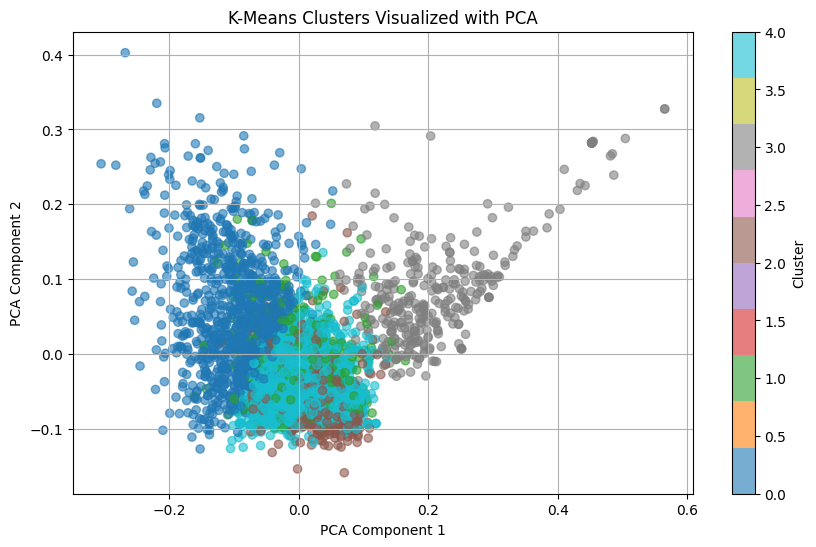

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(X.toarray())

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
                      c=kmeans.labels_, cmap='tab10', alpha=0.6)
plt.title("K-Means Clusters Visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [9]:
# Assign cluster labels to each cleaned text
df_clustered = pd.DataFrame({
    'text': cleaned_texts,
    'cluster': kmeans.labels_
})

# Display first 10 rows
df_clustered.head(10)

,text,cluster
7,it was a video of a man biologist explaining h...,4
8,i have a gut feeling that in the future the fo...,0
12,l,4
20,so my partner and me where discussing going to...,4
22,nívea new ad for skincare for men has a footba...,4
27,traditionally the christian faith taught us th...,4
35,hi a bit of self promo here but i recently wro...,2
36,hi all i wrote this essay about the expectatio...,3
37,,4
51,if you re genuinely happy and that joy is deri...,0


In [10]:
# Your custom cluster labels
cluster_names = {
    0: "Gendered Emotion & Reflection",
    1: "Political Discussion",
    2: "Feminist Theory & Resources",
    3: "Link-heavy or External Content",
    4: "Personal Views & Identity"
}

# Create a new column with human-readable labels
df_clustered['cluster_name'] = df_clustered['cluster'].map(cluster_names)

# Preview with names
df_clustered.head(10)


,text,cluster,cluster_name
7,it was a video of a man biologist explaining h...,4,Personal Views & Identity
8,i have a gut feeling that in the future the fo...,0,Gendered Emotion & Reflection
12,l,4,Personal Views & Identity
20,so my partner and me where discussing going to...,4,Personal Views & Identity
22,nívea new ad for skincare for men has a footba...,4,Personal Views & Identity
27,traditionally the christian faith taught us th...,4,Personal Views & Identity
35,hi a bit of self promo here but i recently wro...,2,Feminist Theory & Resources
36,hi all i wrote this essay about the expectatio...,3,Link-heavy or External Content
37,,4,Personal Views & Identity
51,if you re genuinely happy and that joy is deri...,0,Gendered Emotion & Reflection


/tmp/ipython-input-11-3477980508.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


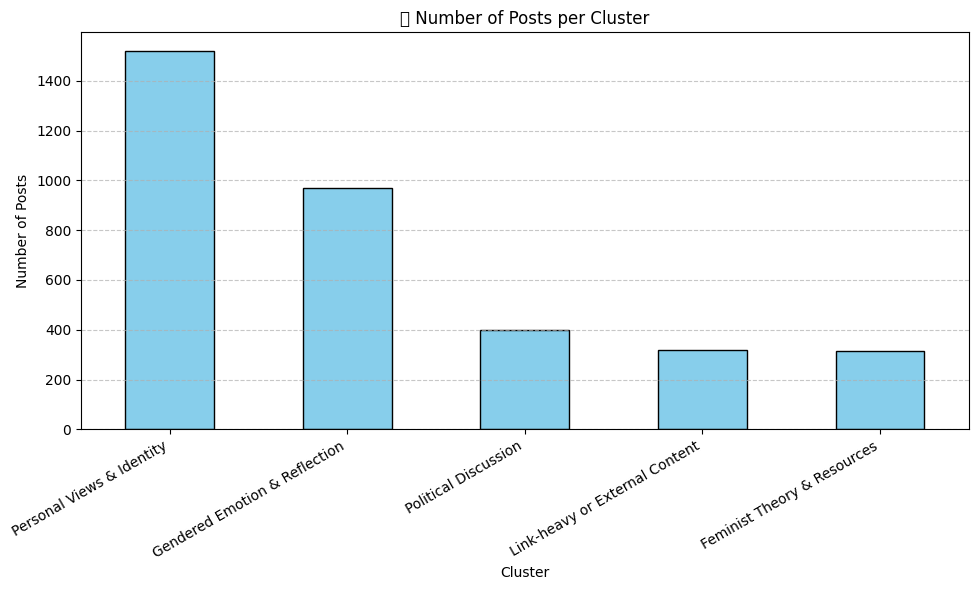

In [11]:
import matplotlib.pyplot as plt

# Count posts per cluster name
cluster_counts = df_clustered['cluster_name'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("📊 Number of Posts per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Posts")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
df_clustered.to_csv("clustered_texts_named.csv", index=False)

from google.colab import files
files.download("clustered_texts_named.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# --- Step 1: Add source column and combine
df_before['source'] = 'before'
df_after['source'] = 'after'
df_all = pd.concat([df_before, df_after], ignore_index=True)

# --- Step 2: Clean text
valid_texts = df_all['selftext'].dropna()
valid_texts = valid_texts[~valid_texts.str.lower().isin(['[removed]', '[deleted]', ''])]
valid_texts = valid_texts.astype(str)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

cleaned_texts = valid_texts.apply(clean_text)

# --- Step 3: TF-IDF + KMeans
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_df=0.9, min_df=5)
X = vectorizer.fit_transform(cleaned_texts)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# --- Step 4: Create final DataFrame
cluster_names = {
    0: "Gendered Emotion & Reflection",
    1: "Political Discussion",
    2: "Feminist Theory & Resources",
    3: "Link-heavy or External Content",
    4: "Personal Views & Identity"
}

df_clustered = pd.DataFrame({
    'text': cleaned_texts,
    'cluster': kmeans.labels_,
    'cluster_name': [cluster_names[c] for c in kmeans.labels_],
    'source': df_all.loc[valid_texts.index, 'source'].values
})

# --- Step 5: Export CSVs
df_clustered[df_clustered['source'] == 'before'].to_csv("clustered_texts_before.csv", index=False)
df_clustered[df_clustered['source'] == 'after'].to_csv("clustered_texts_after.csv", index=False)

# --- Optional: Download them
from google.colab import files
files.download("clustered_texts_before.csv")
files.download("clustered_texts_after.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

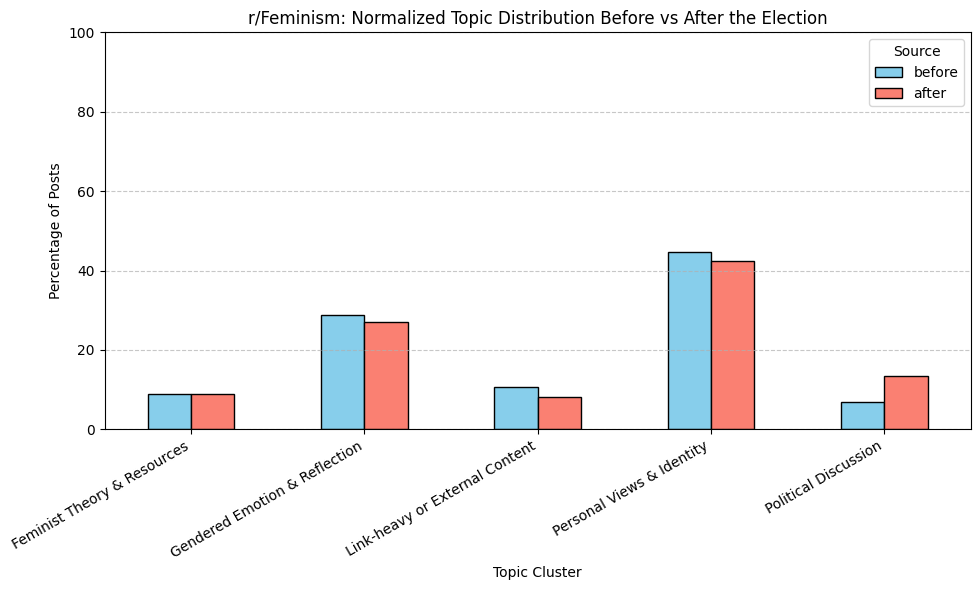

In [26]:
import matplotlib.pyplot as plt

# Count posts per cluster name and source
cluster_counts = df_clustered.groupby(['cluster_name', 'source']).size().unstack(fill_value=0)

# Normalize to percentages within each period
cluster_props = cluster_counts.div(cluster_counts.sum(axis=0), axis=1) * 100

# Ensure "before" is first and "after" is second
cluster_props = cluster_props[['before', 'after']]

# Plot
ax = cluster_props.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')

ax.set_title("r/Feminism: Normalized Topic Distribution Before vs After the Election")
ax.set_xlabel("Topic Cluster")
ax.set_ylabel("Percentage of Posts")
ax.set_ylim(0, 100)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend(title="Source")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [16]:
# Upload the files manually
uploaded = files.upload()

Saving r_MensRights_posts(afterElection) (1).jsonl to r_MensRights_posts(afterElection) (1).jsonl
Saving r_MensRights_posts(beforeElection) (1).jsonl to r_MensRights_posts(beforeElection) (1).jsonl


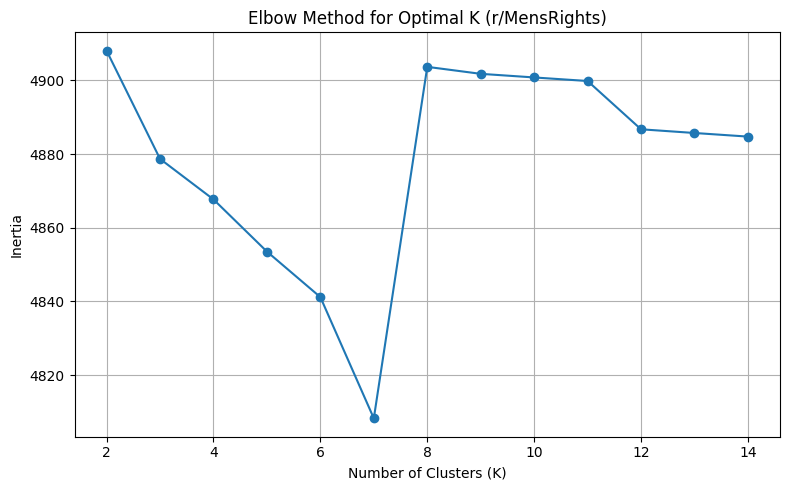

In [17]:
# --- Load JSONL files
def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

# File names (must match uploaded files)
file_before = "r_MensRights_posts(afterElection) (1).jsonl"
file_after = "r_MensRights_posts(beforeElection) (1).jsonl"

# Load data
data_before = load_jsonl(file_before)
data_after = load_jsonl(file_after)

# DataFrames
df_before = pd.DataFrame(data_before)
df_after = pd.DataFrame(data_after)

# Add labels
df_before['source'] = 'before'
df_after['source'] = 'after'
df_all = pd.concat([df_before, df_after], ignore_index=True)

# --- Clean and filter text
valid_texts = df_all['selftext'].dropna()
valid_texts = valid_texts[~valid_texts.str.lower().isin(['[removed]', '[deleted]', ''])]
valid_texts = valid_texts.astype(str)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

cleaned_texts = valid_texts.apply(clean_text)

# --- TF-IDF
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_df=0.9, min_df=5)
X = vectorizer.fit_transform(cleaned_texts)

# --- Elbow Method
inertias = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# --- Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for Optimal K (r/MensRights)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# KMeans clustering
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Top terms per cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("🧠 Top terms per cluster:")
for i in range(optimal_k):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"\nCluster {i}: {', '.join(top_terms)}")

🧠 Top terms per cluster:

Cluster 0: men, https, women, male, com, female, people, know, like, rape

Cluster 1: boys, girls, men, teachers, school, women, boy, https, grades, male

Cluster 2: like, man, get, woman, would, even, people, women, one, men

Cluster 3: men, women, like, even, people, man, male, get, society, rights

Cluster 4: https, com, www, si, youtube, youtu, png, reddit, watch, news

Cluster 5: child, children, support, court, family, father, fathers, kids, custody, mother


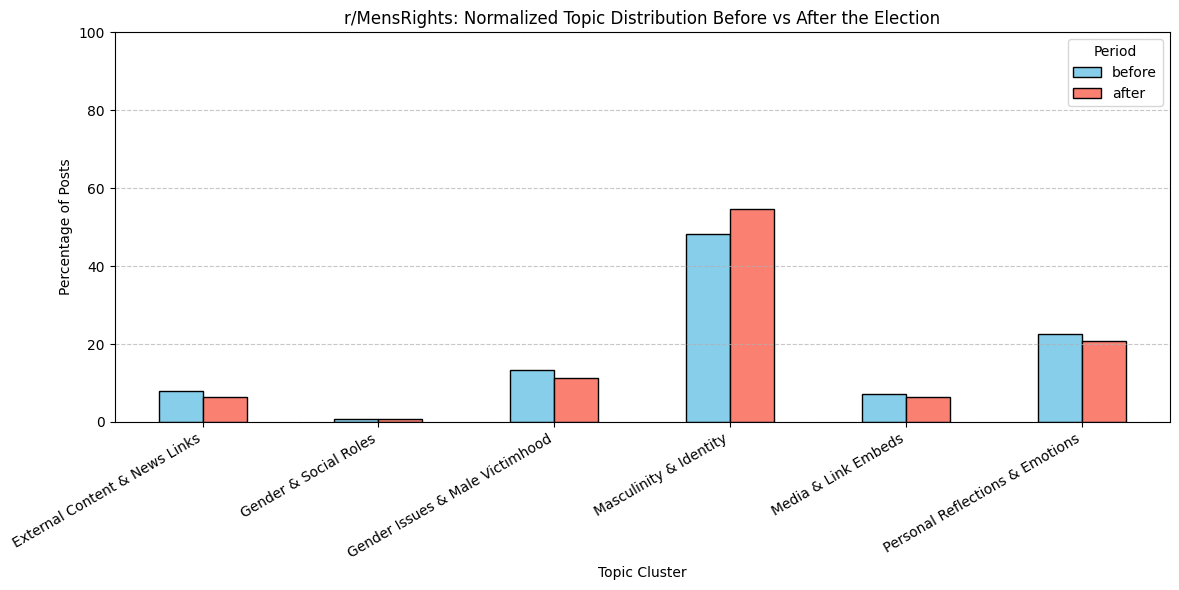

In [32]:
import matplotlib.pyplot as plt

# Assign human-readable cluster names
cluster_names_mensrights = {
    0: "Media & Link Embeds",
    1: "Personal Reflections & Emotions",
    2: "Gender & Social Roles",
    3: "External Content & News Links",
    4: "Gender Issues & Male Victimhood",
    5: "Masculinity & Identity"
}

# Create clustered DataFrame with named clusters
df_clustered_mr = pd.DataFrame({
    'text': cleaned_texts,
    'cluster': kmeans.labels_,
    'cluster_name': [cluster_names_mensrights[c] for c in kmeans.labels_],
    'source': df_all.loc[valid_texts.index, 'source'].values
})

# Export to CSVs
df_clustered_mr[df_clustered_mr['source'] == 'before'].to_csv("MensRights_clustered_before.csv", index=False)
df_clustered_mr[df_clustered_mr['source'] == 'after'].to_csv("MensRights_clustered_after.csv", index=False)

# Count posts per cluster and source
counts = df_clustered_mr.groupby(['cluster_name', 'source']).size().unstack(fill_value=0)

# Ensure "before" is first and "after" is second
counts = counts[['before', 'after']]

# Normalize within each period (column) so sums to 100
props = counts.divide(counts.sum(axis=0), axis=1) * 100

# Plot
ax = props.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'], edgecolor='black')

ax.set_title("r/MensRights: Normalized Topic Distribution Before vs After the Election")
ax.set_xlabel("Topic Cluster")
ax.set_ylabel("Percentage of Posts")
ax.set_ylim(0, 100)
ax.set_xticklabels(props.index, rotation=30, ha='right')
ax.legend(title="Period")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Download both CSV files
files.download("MensRights_clustered_before.csv")
files.download("MensRights_clustered_after.csv")


===== Cluster Top Terms =====

Cluster 0: ['youtu', 'png', 'si', 'https', 'webp', 'width', 'redd', 'format', 'preview', 'auto']
Cluster 1: ['like', 'get', 'life', 'time', 'even', 'want', 'would', 'one', 'feel', 'know']
Cluster 2: ['like', 'people', 'man', 'boys', 'woman', 'men', 'girls', 'would', 'think', 'women']
Cluster 3: ['https', 'com', 'www', 'youtube', 'reddit', 'news', 'watch', 'uk', 'men', 'co']
Cluster 4: ['men', 'https', 'women', 'male', 'com', 'sexual', 'rape', 'www', 'rights', 'child']
Cluster 5: ['men', 'women', 'like', 'even', 'man', 'people', 'get', 'male', 'society', 'rights']




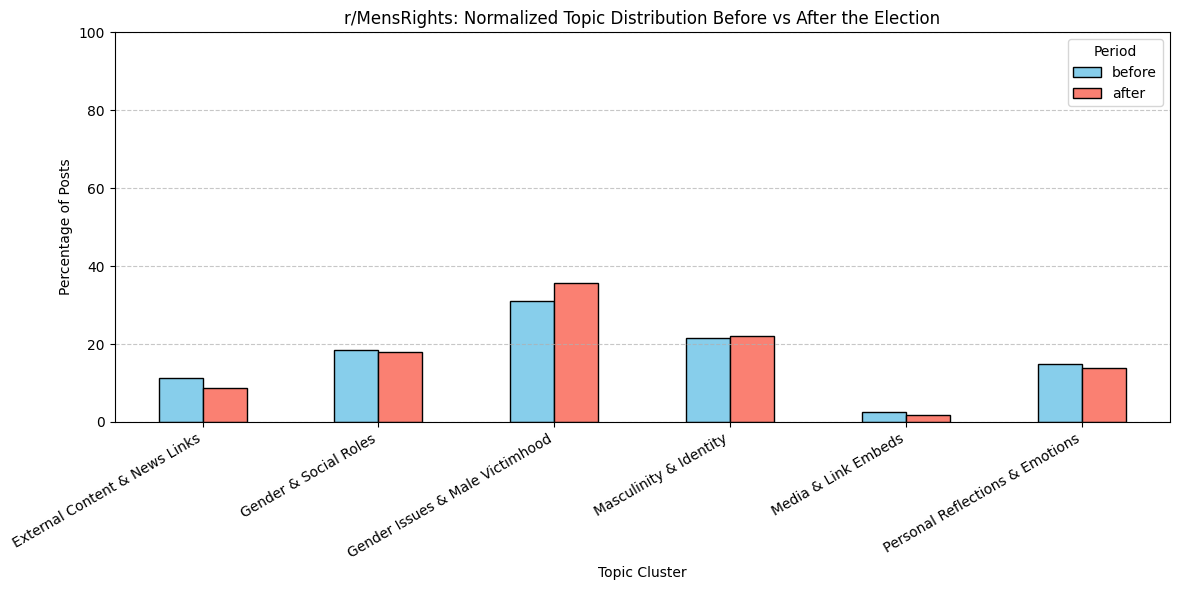

In [34]:
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords

# --- Load JSONL
def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

# --- Correct labeling of file paths
file_before = "r_MensRights_posts(beforeElection) (1).jsonl"
file_after = "r_MensRights_posts(afterElection) (1).jsonl"

# --- Load Data
data_before = load_jsonl(file_before)
data_after = load_jsonl(file_after)

df_before = pd.DataFrame(data_before)
df_after = pd.DataFrame(data_after)
df_before['source'] = 'before'
df_after['source'] = 'after'

df_all = pd.concat([df_before, df_after], ignore_index=True)

# --- Clean Text
valid_texts = df_all['selftext'].dropna()
valid_texts = valid_texts[~valid_texts.str.lower().isin(['[removed]', '[deleted]', ''])]
valid_texts = valid_texts.astype(str)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

cleaned_texts = valid_texts.apply(clean_text)

# --- TF-IDF Vectorization
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df=0.9, min_df=5)
X = vectorizer.fit_transform(cleaned_texts)

# --- Choose K and Fit KMeans
optimal_k = 6  # Replace with your K from elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# --- Inspect Top Terms for Each Cluster
print("\n===== Cluster Top Terms =====\n")
for i in range(kmeans.n_clusters):
    top_indices = kmeans.cluster_centers_[i].argsort()[-10:][::-1]
    top_terms = [vectorizer.get_feature_names_out()[j] for j in top_indices]
    print(f"Cluster {i}: {top_terms}")
print("\n=============================\n")

# *STOP HERE*
# Look at the printed top terms and assign correct names for this run:

cluster_names_mensrights = {
    0: "Media & Link Embeds",
    1: "Personal Reflections & Emotions",
    2: "Gender & Social Roles",
    3: "External Content & News Links",
    4: "Gender Issues & Male Victimhood",
    5: "Masculinity & Identity"
}

# --- Create Labeled DataFrame
df_clustered_mr = pd.DataFrame({
    'text': cleaned_texts,
    'cluster': kmeans.labels_,
    'cluster_name': [cluster_names_mensrights[c] for c in kmeans.labels_],
    'source': df_all.loc[valid_texts.index, 'source'].values
})

# --- Optional: Export CSVs
df_clustered_mr[df_clustered_mr['source'] == 'before'].to_csv("MensRights_clustered_before.csv", index=False)
df_clustered_mr[df_clustered_mr['source'] == 'after'].to_csv("MensRights_clustered_after.csv", index=False)

# --- Count Posts Per Cluster
counts = df_clustered_mr.groupby(['cluster_name', 'source']).size().unstack(fill_value=0)

# --- Ensure Correct Column Order
counts = counts[['before', 'after']]

# --- Normalize to Percentages
props = counts.divide(counts.sum(axis=0), axis=1) * 100

# --- Plot
ax = props.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'], edgecolor='black')
ax.set_title("r/MensRights: Normalized Topic Distribution Before vs After the Election")
ax.set_xlabel("Topic Cluster")
ax.set_ylabel("Percentage of Posts")
ax.set_ylim(0, 100)
ax.set_xticklabels(props.index, rotation=30, ha='right')
ax.legend(title="Period")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [21]:
from google.colab import files

# Upload the files manually
uploaded = files.upload()

Saving r_lgbt_posts(afterElection) (1).jsonl to r_lgbt_posts(afterElection) (1).jsonl
Saving r_lgbt_posts(beforeElection) (1).jsonl to r_lgbt_posts(beforeElection) (1).jsonl


In [22]:
# Install necessary packages and download stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

/tmp/ipython-input-23-3957835245.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_before, df_after], ignore_index=True)


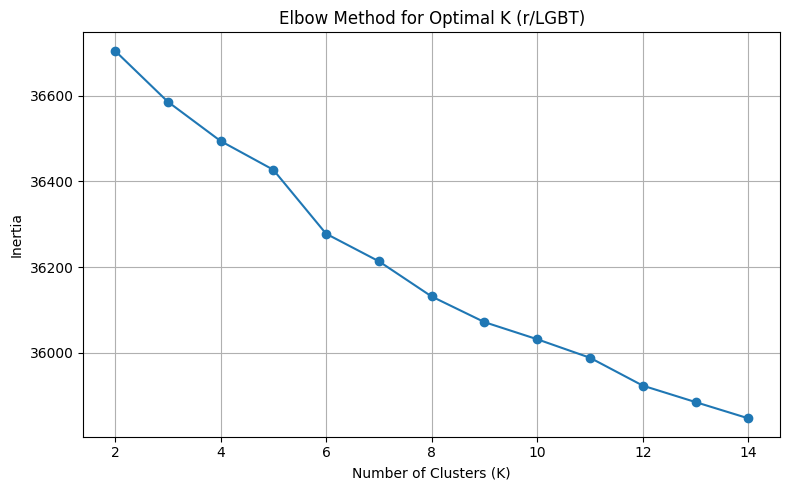

In [23]:
# --- Imports
import pandas as pd
import json, re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# --- Load JSONL files
def load_jsonl(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

file_before = "r_lgbt_posts(beforeElection) (1).jsonl"
file_after = "r_lgbt_posts(afterElection) (1).jsonl"

data_before = load_jsonl(file_before)
data_after = load_jsonl(file_after)

df_before = pd.DataFrame(data_before)
df_after = pd.DataFrame(data_after)

df_before['source'] = 'before'
df_after['source'] = 'after'
df_all = pd.concat([df_before, df_after], ignore_index=True)

# --- Clean and filter
valid_texts = df_all['selftext'].dropna()
valid_texts = valid_texts[~valid_texts.str.lower().isin(['[removed]', '[deleted]', ''])]
valid_texts = valid_texts.astype(str)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

cleaned_texts = valid_texts.apply(clean_text)

# --- TF-IDF
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_df=0.9, min_df=5)
X = vectorizer.fit_transform(cleaned_texts)

# --- Elbow Method
inertias = []
K_range = range(2, 15)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for Optimal K (r/LGBT)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
from sklearn.cluster import KMeans

# Set K
optimal_k = 6

# Fit model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Inspect top terms per cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

print("🧠 Top terms per cluster:")
for i in range(optimal_k):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"\nCluster {i}: {', '.join(top_terms)}")

🧠 Top terms per cluster:

Cluster 0: gay, people, like, know, straight, im, friends, think, men, want

Cluster 1: know, like, really, want, friends, would, feel, time, even, said

Cluster 2: png, webp, width, preview, format, auto, redd, https, pjpg, jpg

Cluster 3: women, men, attracted, like, woman, man, feel, attraction, lesbian, think

Cluster 4: like, feel, im, gender, know, girl, really, want, think, trans

Cluster 5: people, trans, like, know, pride, want, would, queer, get, community


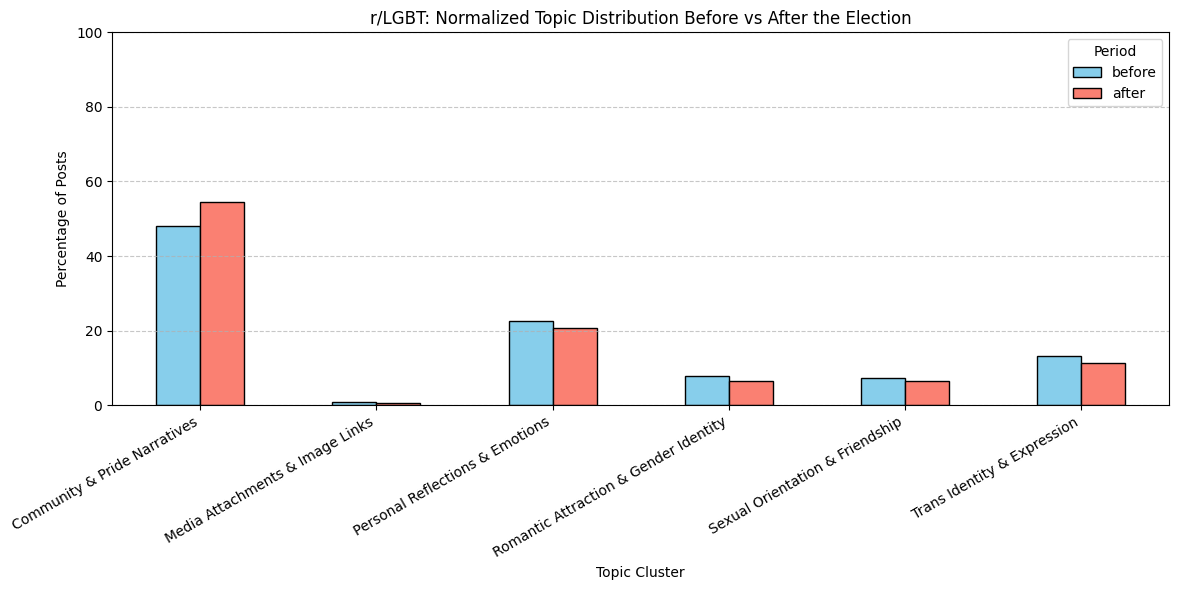

In [31]:
import matplotlib.pyplot as plt

# Assign names to clusters
cluster_names_lgbt = {
    0: "Sexual Orientation & Friendship",
    1: "Personal Reflections & Emotions",
    2: "Media Attachments & Image Links",
    3: "Romantic Attraction & Gender Identity",
    4: "Trans Identity & Expression",
    5: "Community & Pride Narratives"
}

# Create final DataFrame with named clusters
df_clustered = pd.DataFrame({
    'text': cleaned_texts,
    'cluster': kmeans.labels_,
    'cluster_name': [cluster_names_lgbt[c] for c in kmeans.labels_],
    'source': df_all.loc[valid_texts.index, 'source'].values
})

# Export to CSV
df_clustered[df_clustered['source'] == 'before'].to_csv("LGBT_clustered_before.csv", index=False)
df_clustered[df_clustered['source'] == 'after'].to_csv("LGBT_clustered_after.csv", index=False)

# Group and normalize counts to percentages
counts = df_clustered.groupby(['cluster_name', 'source']).size().unstack(fill_value=0)
props = counts.div(counts.sum(axis=0), axis=1) * 100
props = props[['before', 'after']]  # Ensure order

# Plot with corrected colors: before = blue, after = red
ax = props.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'], edgecolor='black')

ax.set_title("r/LGBT: Normalized Topic Distribution Before vs After the Election")
ax.set_xlabel("Topic Cluster")
ax.set_ylabel("Percentage of Posts")
ax.set_ylim(0, 100)
ax.set_xticklabels(props.index, rotation=30, ha='right')
ax.legend(title="Period")
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files

# Trigger download for both CSV files
files.download("LGBT_clustered_before.csv")
files.download("LGBT_clustered_after.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>